In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

df_vendas = pd.DataFrame.from_dict(dados_vendas)

In [9]:
df_vendas['mes_int'] = df_vendas.index + 1

In [10]:
df_vendas

,mes,vendas,mes_int
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3
3,Abril,2500,4
4,Maio,2600,5
5,Junho,2700,6
6,Julho,2800,7
7,Agosto,2900,8
8,Setembro,3000,9
9,Outubro,3100,10


In [8]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   mes      12 non-null     object
 1   vendas   12 non-null     int64 
 2   mes_int  12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 420.0+ bytes


In [11]:
X = df_vendas[["mes_int"]]
y = df_vendas["vendas"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mean_squared_error = {mse}")
print(f"r2_score = {r2}")

mean_squared_error = 314.8846687478333
r2_score = 0.9977508237946583


In [40]:
coef = model.coef_
intercept = model.intercept_

print(f"coefficient = {coef}")
print(f"intercept = {intercept}")

coefficient = [113.30645161]
intercept = 1979.4354838709678


In [48]:
month = 12
november_predict = model.predict([[month]])

print(f"Previsão de vendas para dezembro = {round(november_predict[0], 2)}")

Previsão de vendas para dezembro = 3339.11


c:\Users\pedro\.virtualenvs\ia-scikit-learn-P6DiWZFx\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Axes: >

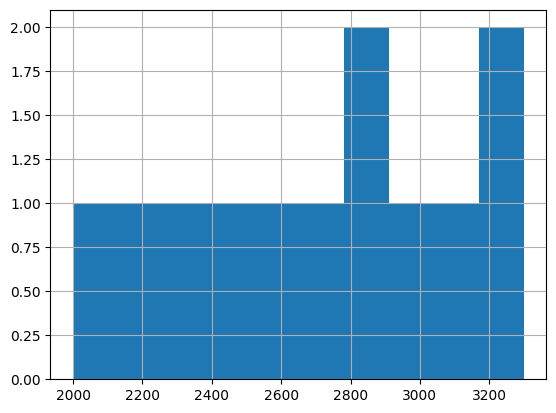

In [49]:
df_vendas['vendas'].hist()

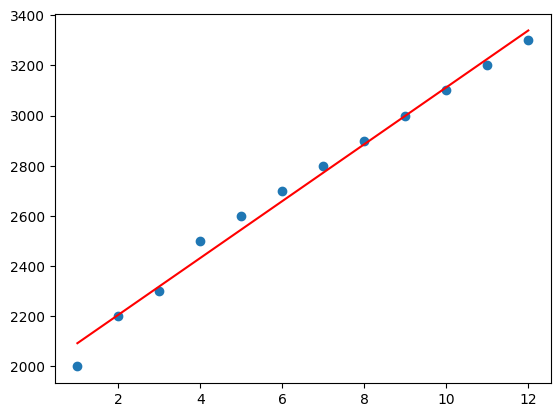

In [60]:
plt.scatter(df_vendas['mes_int'], df_vendas['vendas'])
plt.plot(df_vendas['mes_int'], model.predict(df_vendas[['mes_int']]), color='red')